In [1]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
import csv
from scipy.optimize import curve_fit

This code snippet is intended to calculate the quantum yield of a photoluminescent sample by comparing its properties with another sample of known quantum yield, hence why we describe this method as quantum yield with standard. The protocol for the preparation and measurement of the samples needed for this method are detailed in (this document).

In [2]:
#necessary functions
def txt_to_data(path):
    """Generates a numpy array from the tab-delimited txt output files of the EMspec montage

    Args:
        path (string): Relative path of the txt file to be transformed

    Returns:
        data: A 2D numpy array containing the wavelengths in nm in the first column and the counts in the second column
    """
    raw_data = open(path).read()
    data = []
    for i in raw_data.split("\n")[17:-2]:
        data += [i.split("\t")]
    return np.array(data).astype(float)

def csv_2_data(path, stop):
    with open(path) as file:
        content = csv.reader(file)
        raw_data = []
        for i in content:
            raw_data += [i[:-1]]
    return np.array(raw_data[2:stop]).astype(float)

In [3]:
#Initializing data:
QD_ab_02 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260123-05.csv", 402)
QD_ab_04 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260123-04.csv", 402)
QD_ab_06 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260123-06.csv", 402)
QD_ab_08 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260123-07.csv", 402)
QD_ab_10 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260123-08.csv", 402)
QD_ab = [QD_ab_02, QD_ab_04, QD_ab_06, QD_ab_08, QD_ab_10]

QD_em_02 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260123-12.txt")
QD_em_04 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260123-11.txt")
QD_em_06 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260123-13.txt")
QD_em_08 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260123-14.txt")
QD_em_10 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260123-15.txt")
QD_em = [QD_em_02, QD_em_04, QD_em_06, QD_em_08, QD_em_10]

Fluo_ab_02 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260127-9.csv", 353)
Fluo_ab_04 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260127-8.csv", 353)
Fluo_ab_06 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260127-7.csv", 353)
Fluo_ab_08 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260127-6.csv", 353)
Fluo_ab_10 = csv_2_data("C:/DATA/Université/Maitrise/PN2026/XM260127-5.csv", 353)
Fluo_ab = [Fluo_ab_02, Fluo_ab_04, Fluo_ab_06, Fluo_ab_08, Fluo_ab_10]

Fluo_em_02 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260127-18.txt")
Fluo_em_04 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260127-17.txt")
Fluo_em_06 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260127-16.txt")
Fluo_em_08 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260127-15.txt")
Fluo_em_10 = txt_to_data("C:/DATA/Université/Maitrise/PN2026/XM260127-14.txt")
Fluo_em = [Fluo_em_02, Fluo_em_04, Fluo_em_06, Fluo_em_08, Fluo_em_10]

In [4]:
#treating the absorption data (x coords)
def Abs_finder(spectrum, wavelength):
    ind = np.where(abs(spectrum[:, -2] - wavelength) <= 0.5)
    return float(spectrum[ind,-1])

QD_ab_406 = [0]
for i in QD_ab:
    QD_ab_406 += [Abs_finder(i, 406)]
print(QD_ab_406)

Fluo_ab_406 = [0]
for i in Fluo_ab:
    Fluo_ab_406 += [Abs_finder(i, 406)]
print(Fluo_ab_406)

[0, 0.01520153042, 0.045926169, 0.05864686891, 0.07931730151, 0.09819221497]
[0, 0.012833658, 0.031527486, 0.046864185, 0.062803321, 0.073989518]


In [5]:
#Computing emission data (this one is a doozy)(y coords)
def emission_integrator(spectrum, range):
    start = np.where(abs(spectrum[:, -2] - range[0]) <= 0.25)[0]
    end = np.where(abs(spectrum[:, -2] - range[1]) <= 0.25)[0]
    return np.sum(spectrum[start[0]:end[0], -1])

QD_em_range = (525, 675)
QD_int_em = [0]
for i in QD_em:
    QD_int_em += [emission_integrator(i, QD_em_range)]
print(QD_int_em)

Fluo_em_range = (450, 700)
Fluo_int_em = [0]
for i in Fluo_em:
    Fluo_int_em += [emission_integrator(i, Fluo_em_range)]
print(Fluo_int_em)

[0, 40086.0, 115208.0, 123717.0, 148427.0, 166065.0]
[0, 80251.0, 184561.0, 253982.0, 311592.0, 338182.0]


In [10]:
#Fitting the gradients
def curve(x, a):
    return x*a

#QDs first
popt_QD, pcov_QD = curve_fit(curve, QD_ab_406, QD_int_em, 1000000)
incert_QD = np.sqrt(np.diag(pcov_QD))
print(f"Grad QDs = {popt_QD} ± {incert_QD}")

#Fluo
popt_Fluo, pcov_Fluo = curve_fit(curve, Fluo_ab_406, Fluo_int_em, 1000000)
incert_Fluo = np.sqrt(np.diag(pcov_Fluo))
print(f"Grad Fluo = {popt_Fluo} ± {incert_Fluo}")



Grad QDs = [1899126.51535463] ± [116878.10780849]
Grad Fluo = [4958824.49548005] ± [192363.6412831]


<function matplotlib.pyplot.show(close=None, block=None)>

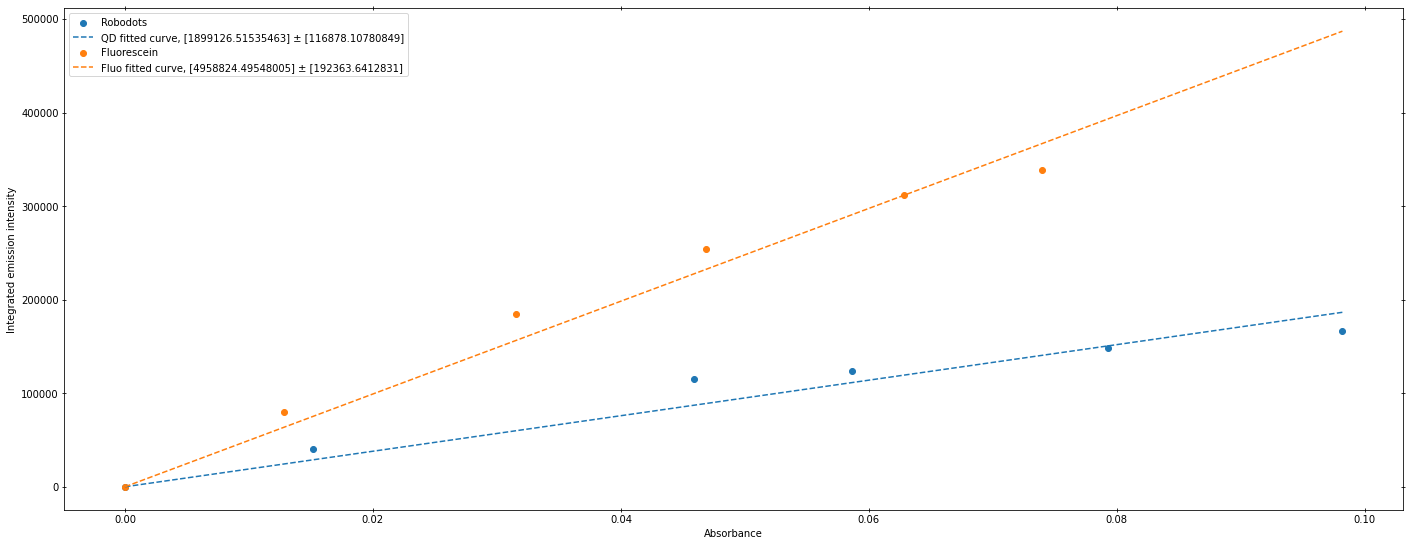

In [7]:
#Graphical representation of everything for a sanity check
fig, ax = plt.subplots(figsize=(24, 12))
fig.subplots_adjust(bottom=0.3)

plt.scatter(QD_ab_406, QD_int_em, label = "Robodots")
plt.plot(QD_ab_406, curve(QD_ab_406, popt_QD), ls = "--", label = f"QD fitted curve, {popt_QD} ± {np.sqrt(np.diag(pcov_QD))}")
plt.scatter(Fluo_ab_406, Fluo_int_em, label = "Fluorescein")
plt.plot(QD_ab_406, curve(QD_ab_406, popt_Fluo), ls = "--", label = f"Fluo fitted curve, {popt_Fluo} ± {np.sqrt(np.diag(pcov_Fluo))}")

ax.tick_params("both", direction = "inout", top = True, right = True)
plt.xlabel("Absorbance")
plt.ylabel("Integrated emission intensity")
plt.legend()
plt.show

In [20]:
#The big result: QY
Fluo_QY = 0.79 #from protocol
Hex_ref_ind = 1.3878 #taken online
H2O_ref_ind = 1.3388 #taken online

QD_QY = Fluo_QY*(popt_QD/popt_Fluo)*(Hex_ref_ind/H2O_ref_ind)**2
rel_incert_QY = 0.01/Fluo_QY + incert_QD/popt_QD + incert_Fluo/popt_Fluo + 2*(0.0001/1.3878 + 0.0001/1.3388)
incert_QY = rel_incert_QY*QD_QY
print("Congratulations! You did all of that for these results:\n")
print(f"Quantum Yield (raw): {QD_QY[0]} ± {incert_QY[0]}")
print(f"Quantum Yield (rounded): {round(QD_QY[0], 2)} ± {round(incert_QY[0], 2)}")
print(f"Relative uncertainty: {100*rel_incert_QY[0]} %")
print("\nI hope you're satisfied! If not, I'm sorry for your loss.")

Congratulations! You did all of that for these results:

Quantum Yield (raw): 0.3251057193207415 ± 0.03683025190929571
Quantum Yield (rounded): 0.33 ± 0.04
Relative uncertainty: 11.328700087542867 %

I hope you're satisfied! If not, I'm sorry for your loss.
